# Note:

1. The training was done on kaggle to load the dataset easily and train the model faster by using their resources.
2. The dataset has been loaded from keras.datasets

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.datasets import cifar10

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

In [14]:
selected_classes = [0, 1, 2]
def filter_classes(x, y):
    idx = np.isin(y, selected_classes)
    x, y = x[idx], y[idx]
    y = np.array([selected_classes.index(i) for i in y])
    return x, y

x_train, y_train = filter_classes(x_train, y_train)
x_test, y_test = filter_classes(x_test, y_test)

In [16]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return z > 0

def one_hot(y, num_classes):
    onehot = np.zeros((y.size, num_classes))
    onehot[np.arange(y.size), y] = 1
    return onehot


In [17]:
input_size = x_train.shape[1] * x_train.shape[2] * x_train.shape[3] 
input_size


3072

Epoch 1/100, Loss: 1.0774, Test Accuracy: 52.17%
Epoch 2/100, Loss: 1.0414, Test Accuracy: 45.73%
Epoch 3/100, Loss: 1.0905, Test Accuracy: 37.40%
Epoch 4/100, Loss: 1.0309, Test Accuracy: 54.80%
Epoch 5/100, Loss: 1.0470, Test Accuracy: 47.17%
Epoch 6/100, Loss: 1.0997, Test Accuracy: 35.47%
Epoch 7/100, Loss: 1.0938, Test Accuracy: 36.53%
Epoch 8/100, Loss: 1.0470, Test Accuracy: 48.27%
Epoch 9/100, Loss: 1.0712, Test Accuracy: 55.80%
Epoch 10/100, Loss: 1.0191, Test Accuracy: 47.10%
Epoch 11/100, Loss: 0.8819, Test Accuracy: 61.93%
Epoch 12/100, Loss: 0.8566, Test Accuracy: 50.03%
Epoch 13/100, Loss: 1.0923, Test Accuracy: 34.37%
Epoch 14/100, Loss: 0.9349, Test Accuracy: 44.97%
Epoch 15/100, Loss: 0.9323, Test Accuracy: 50.97%
Epoch 16/100, Loss: 1.0868, Test Accuracy: 46.17%
Epoch 17/100, Loss: 1.0959, Test Accuracy: 48.33%
Epoch 18/100, Loss: 1.0636, Test Accuracy: 50.17%
Epoch 19/100, Loss: 1.1046, Test Accuracy: 44.97%
Epoch 20/100, Loss: 1.0606, Test Accuracy: 54.53%
Epoch 21/

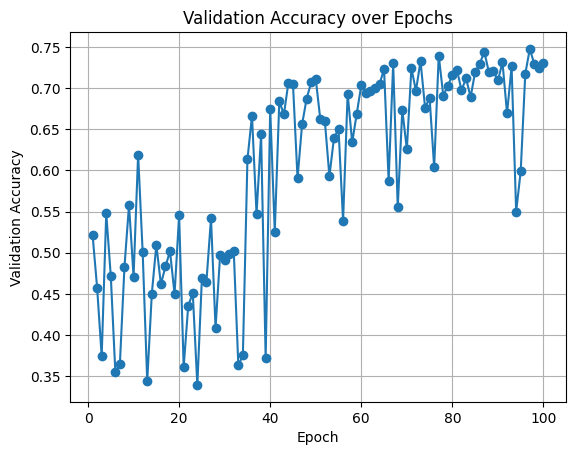

In [18]:
hidden_size = 128
output_size = 3
lr = 0.001
epochs = 100
batch_size = 128
val_acc = []

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))
train_losses = []

for epoch in range(epochs):
    idx = np.random.permutation(x_train.shape[0])
    x_train, y_train = x_train[idx], y_train[idx]

    for i in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        x_batch = x_batch.reshape(x_batch.shape[0], -1)


        z1 = x_batch.dot(W1) + b1
        a1 = relu(z1)
        z2 = a1.dot(W2) + b2
        probs = softmax(z2)
        y_onehot = one_hot(y_batch, output_size)


        loss = -np.mean(np.sum(y_onehot * np.log(probs + 1e-8), axis=1))
        train_losses.append(loss)


        dz2 = probs - y_onehot
        dW2 = a1.T.dot(dz2) / batch_size
        db2 = np.sum(dz2, axis=0, keepdims=True) / batch_size

        da1 = dz2.dot(W2.T)
        dz1 = da1 * relu_derivative(z1)
        dW1 = x_batch.T.dot(dz1) / batch_size
        db1 = np.sum(dz1, axis=0, keepdims=True) / batch_size


        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2


    x_test_flat = x_test.reshape(x_test.shape[0], -1)
    z1_test = x_test_flat.dot(W1) + b1
    a1_test = relu(z1_test)
    z2_test = a1_test.dot(W2) + b2
    probs_test = softmax(z2_test)
    preds_test = np.argmax(probs_test, axis=1)
    acc = np.mean(preds_test == y_test)
    val_acc.append(acc)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Test Accuracy: {acc * 100:.2f}%")

plt.plot(range(1, len(val_acc) + 1), val_acc, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.grid(True)
plt.show()

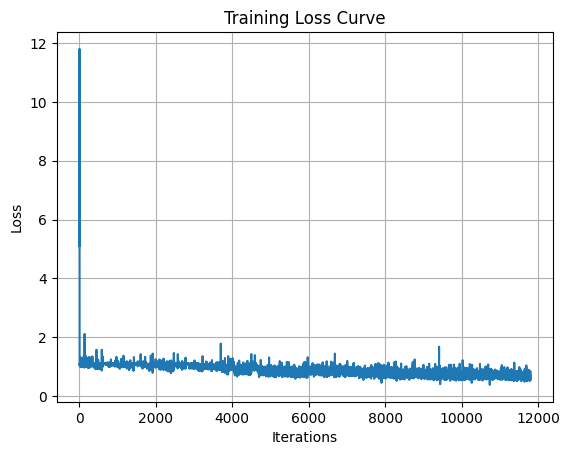

In [19]:
plt.plot(train_losses)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [20]:
def predict(x):
    x = x.reshape(x.shape[0], -1)
    a1 = relu(x.dot(W1) + b1)
    z2 = a1.dot(W2) + b2
    return np.argmax(softmax(z2), axis=1)

y_pred = predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["airplane", "car", "bird"]))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.64      0.79      0.71      1000
         car       0.89      0.66      0.76      1000
        bird       0.73      0.74      0.73      1000

    accuracy                           0.73      3000
   macro avg       0.75      0.73      0.73      3000
weighted avg       0.75      0.73      0.73      3000

Confusion Matrix:
[[791  47 162]
 [227 662 111]
 [222  39 739]]
